In [2]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn import metrics

In [3]:
data = pd.read_csv('data.csv', parse_dates=True)

## 1- Data Understanding

### 1/ a- all data

In [4]:
data.shape

(35040, 11)

In [5]:
data.head(4)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [7]:
data.describe(exclude='object')

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [8]:
data.describe(include='object')

,date,WeekStatus,Day_of_week,Load_Type
count,35040,35040,35040,35040
unique,35040,2,7,3
top,01/01/2018 00:15,Weekday,Monday,Light_Load
freq,1,25056,5088,18072


<AxesSubplot:ylabel='None'>

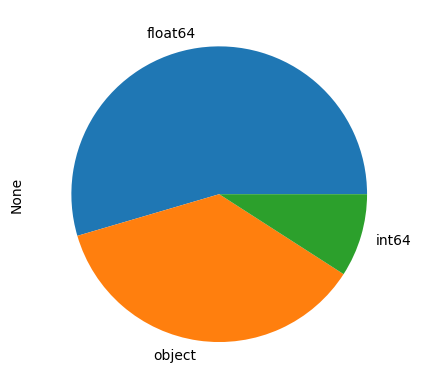

In [9]:
#On remarque que les données sont réparties en trois types : float, int et object.
data.dtypes.value_counts().plot.pie()

### La correlation entre les variables :

In [10]:
#correlation of each variable
data.corr()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


In [11]:
#le plus corrole avec les autres
data.corr().abs().sum()

Usage_kWh                               4.183388
Lagging_Current_Reactive.Power_kVarh    3.823152
Leading_Current_Reactive_Power_kVarh    3.905254
CO2(tCO2)                               4.179254
Lagging_Current_Power_Factor            3.522106
Leading_Current_Power_Factor            3.945870
NSM                                     2.846436
dtype: float64

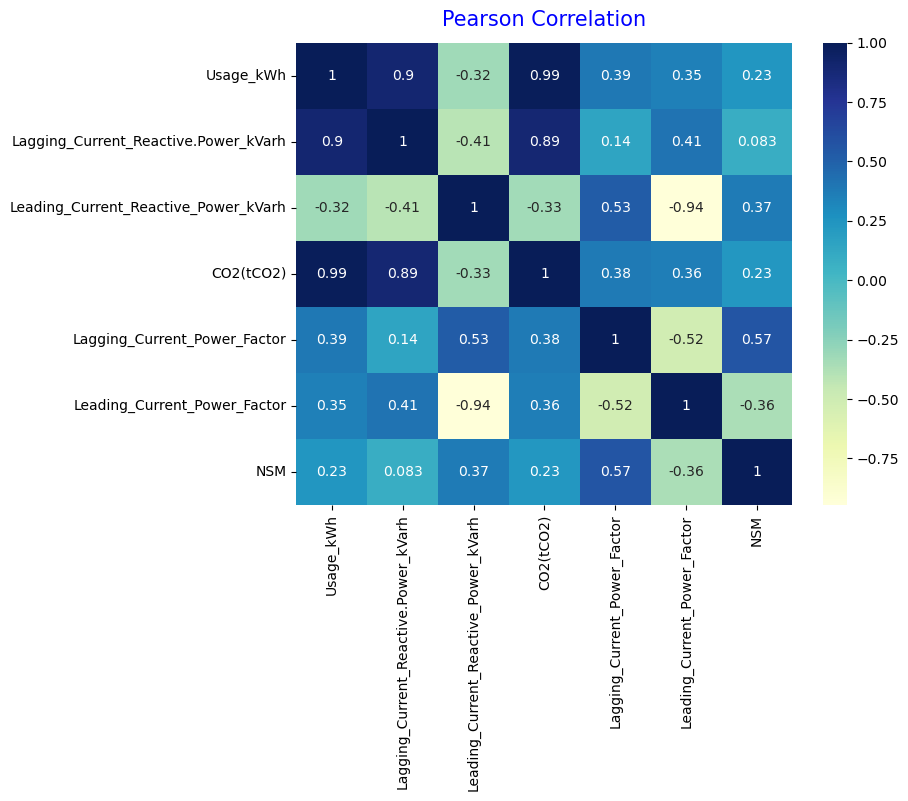

In [12]:
#On remarque que les variables sont corrélées entre elles, donc nous ne pouvons pas en supprimer une
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

#### - Distribution pour chaque variable

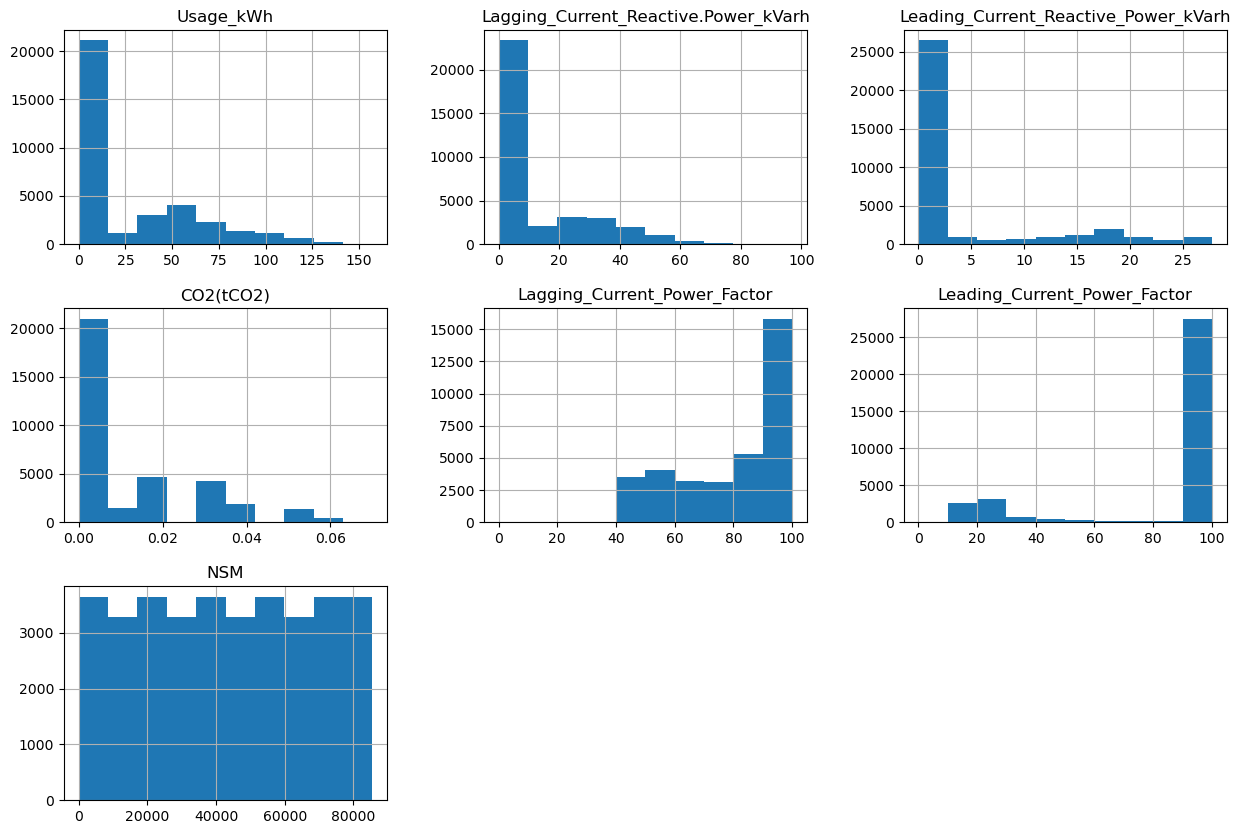

In [13]:
data.hist(figsize = (15,10))
plt.show()

### La visualisation de target (consomation energetique) en fonction d'autres colonnes

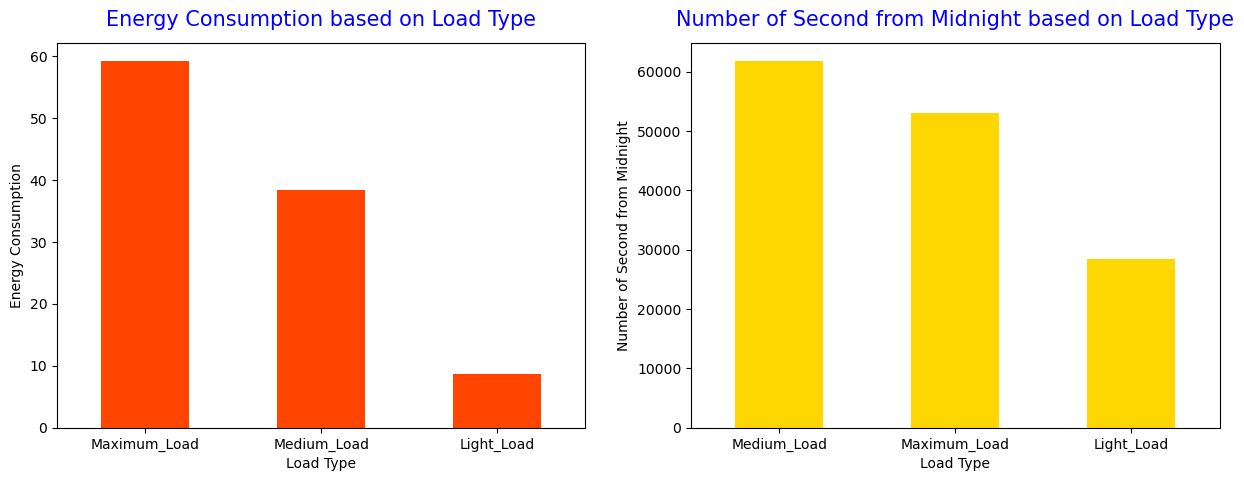

In [14]:
#visualize energy consumption based on load type

plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
chart = data.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption')

#visualize number of second from midnight based on load type
plt.subplot(1, 2, 2)
chart = data.groupby('Load_Type')['NSM'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'gold')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Number of Second from Midnight')
plt.show()

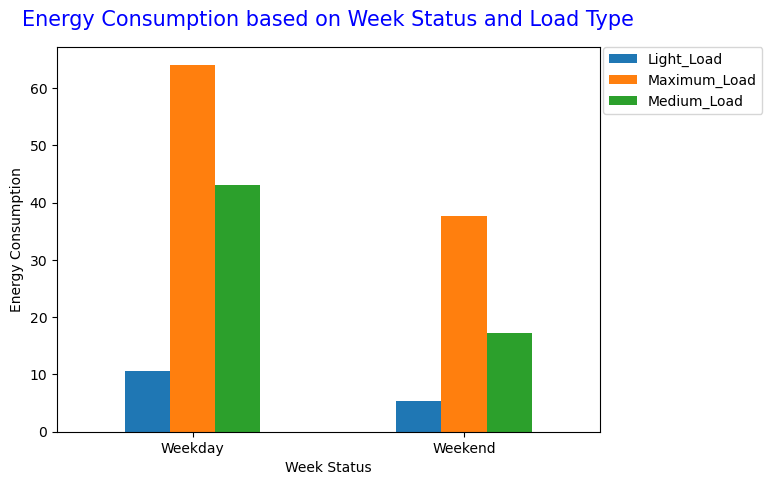

In [15]:
#visualize energy consumption based on week status and load type

plt.rcParams['figure.figsize'] = (7,5)
chart = data.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

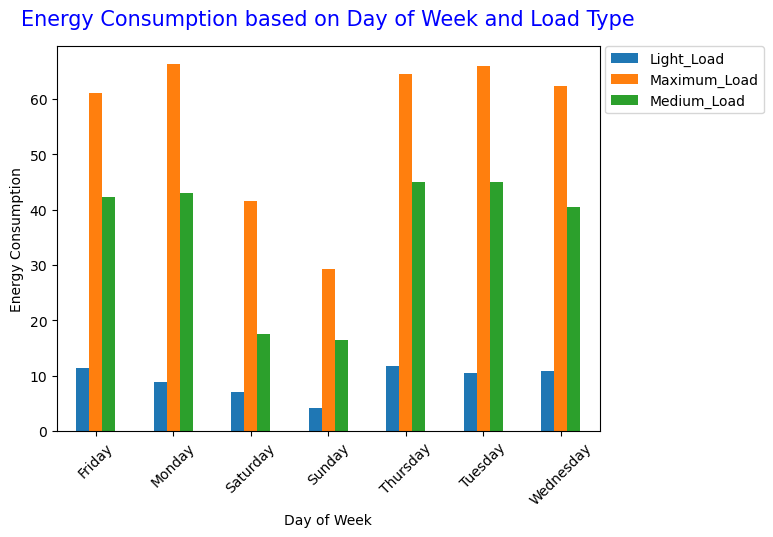

In [16]:
#visualize energy consumption based on day of week and load type

chart = data.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Energy Consumption based on Day of Week and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

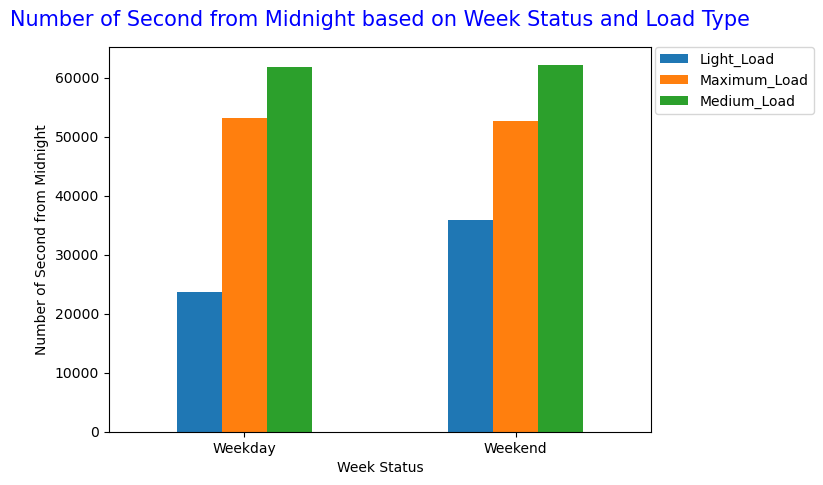

In [17]:
#visualize number of second from midnight based on week status and load type

chart = data.groupby(['WeekStatus','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Number of Second from Midnight')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

###  1/ b- Nun data

In [18]:
data.nunique().sort_values(ascending=False)

date                                    35040
Lagging_Current_Power_Factor             5079
Leading_Current_Power_Factor             3366
Usage_kWh                                3343
Lagging_Current_Reactive.Power_kVarh     1954
Leading_Current_Reactive_Power_kVarh      768
NSM                                        96
CO2(tCO2)                                   8
Day_of_week                                 7
Load_Type                                   3
WeekStatus                                  2
dtype: int64

In [19]:
data.isnull().sum().sort_values(ascending=False)
#Pour voire le nombre des valeures nulles dans chaque colonnes

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

<AxesSubplot:>

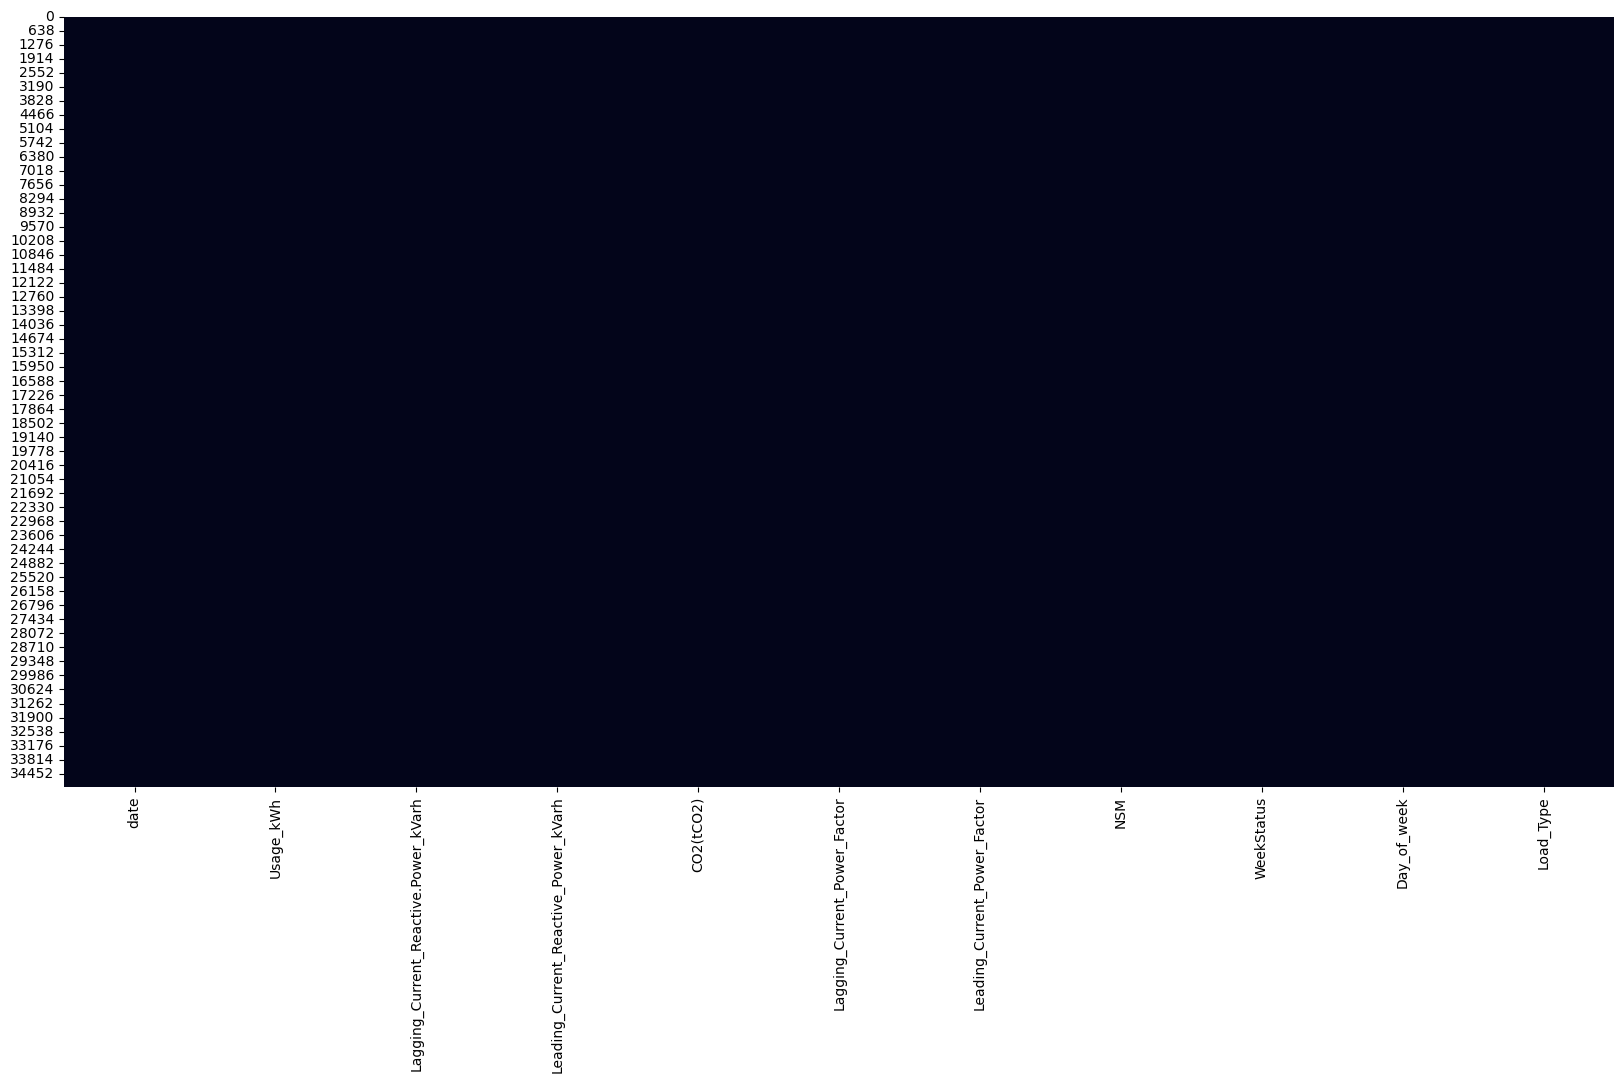

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)
#noire : valeur != nun

####  On observe qu'il n'y a aucune variable manquante.

###  1/ c- parse data

In [21]:
#rename attribute
data = data.rename(columns = {'Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh', 
                          'CO2(tCO2)' : 'CO2'})

In [22]:
#indexing date
data = data.set_index('date')

In [23]:
data.head(4)

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load


###  1/ d- target

In [24]:
target = data['Usage_kWh']
data.drop('Usage_kWh' , axis=1, inplace=True)

In [25]:
target.describe()

count    35040.000000
mean        27.386892
std         33.444380
min          0.000000
25%          3.200000
50%          4.570000
75%         51.237500
max        157.180000
Name: Usage_kWh, dtype: float64

## 2- segmenter data

In [26]:
from sklearn.compose import make_column_selector

categorical_features = make_column_selector(dtype_include='object')
categorical_data = data[categorical_features(data)]


numerical_features = make_column_selector(dtype_exclude='object')
numerical_data = data[numerical_features(data)]

In [27]:
categorical_data = pd.DataFrame(categorical_data)
numerical_data = pd.DataFrame(numerical_data)

In [28]:
numerical_data

,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
date,,,,,,
01/01/2018 00:15,2.95,0.00,0.0,73.21,100.00,900
01/01/2018 00:30,4.46,0.00,0.0,66.77,100.00,1800
01/01/2018 00:45,3.28,0.00,0.0,70.28,100.00,2700
01/01/2018 01:00,3.56,0.00,0.0,68.09,100.00,3600
01/01/2018 01:15,4.50,0.00,0.0,64.72,100.00,4500
...,...,...,...,...,...,...
31/12/2018 23:00,4.86,0.00,0.0,62.10,100.00,82800
31/12/2018 23:15,3.74,0.00,0.0,70.71,100.00,83700
31/12/2018 23:30,3.17,0.07,0.0,76.62,99.98,84600


In [29]:
categorical_data

,WeekStatus,Day_of_week,Load_Type
date,,,
01/01/2018 00:15,Weekday,Monday,Light_Load
01/01/2018 00:30,Weekday,Monday,Light_Load
01/01/2018 00:45,Weekday,Monday,Light_Load
01/01/2018 01:00,Weekday,Monday,Light_Load
01/01/2018 01:15,Weekday,Monday,Light_Load
...,...,...,...
31/12/2018 23:00,Weekday,Monday,Light_Load
31/12/2018 23:15,Weekday,Monday,Light_Load
31/12/2018 23:30,Weekday,Monday,Light_Load


## 3- rassemblage de data

### 3/ a- l'encodage des étiquettes

In [30]:
# Il faut remplacer les valeurs catégoriques par des valeurs numériques telles que 0, 1, 2, etc.

In [31]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()

for i in categorical_data:
    categorical_data[i] = l_encoder.fit_transform(categorical_data[i])

In [32]:
categorical_data

,WeekStatus,Day_of_week,Load_Type
date,,,
01/01/2018 00:15,0,1,0
01/01/2018 00:30,0,1,0
01/01/2018 00:45,0,1,0
01/01/2018 01:00,0,1,0
01/01/2018 01:15,0,1,0
...,...,...,...
31/12/2018 23:00,0,1,0
31/12/2018 23:15,0,1,0
31/12/2018 23:30,0,1,0


### 3/ b- Concatener New Data

In [33]:
# Concatener cat_Data et num_data et spécifier la colonne target

In [34]:
data = pd.concat([categorical_data, numerical_data] ,axis=1)
X = pd.concat([categorical_data, numerical_data] ,axis=1)
y = target

In [35]:
X

,WeekStatus,Day_of_week,Load_Type,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
date,,,,,,,,,
01/01/2018 00:15,0,1,0,2.95,0.00,0.0,73.21,100.00,900
01/01/2018 00:30,0,1,0,4.46,0.00,0.0,66.77,100.00,1800
01/01/2018 00:45,0,1,0,3.28,0.00,0.0,70.28,100.00,2700
01/01/2018 01:00,0,1,0,3.56,0.00,0.0,68.09,100.00,3600
01/01/2018 01:15,0,1,0,4.50,0.00,0.0,64.72,100.00,4500
...,...,...,...,...,...,...,...,...,...
31/12/2018 23:00,0,1,0,4.86,0.00,0.0,62.10,100.00,82800
31/12/2018 23:15,0,1,0,3.74,0.00,0.0,70.71,100.00,83700
31/12/2018 23:30,0,1,0,3.17,0.07,0.0,76.62,99.98,84600


In [36]:
X.describe()

,WeekStatus,Day_of_week,Load_Type,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,0.284932,2.994521,0.760959,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,0.451388,2.000021,0.857523,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,0.000000,3.000000,0.000000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,1.000000,5.000000,2.000000,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,1.000000,6.000000,2.000000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


## 5- Modelisation

In [37]:
# Diviser la base de données en une base de données test et d'entrainement

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print('X_train taille: ', X_train.shape)
print('X_test  taille: ', X_test. shape)
print('y_train taille: ', y_train.shape)
print('y_test  taille: ', y_test.shape)

X_train taille:  (28032, 9)
X_test  taille:  (7008, 9)
y_train taille:  (28032,)
y_test  taille:  (7008,)


In [38]:
# On va appliquer l'algorithmes de la Regression Linear
#Pour la partie d'evaluation, elle sera expliquer par MAE, MSE, RMSE

models={
    'LinearRegression' : LinearRegression(),
}

# La fonction de précision
def accu(y_true,y_pred, retu=False):
    acc = metrics.mean_squared_error(y_true,y_pred)
    if retu:
        return acc
    else:
        #check MAE, MSE and MSE
        print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

        
#c'est la fonction d'application des modéles
def train_test_eval(models,X_train, y_train,X_test,y_test):
    for name,model in models.items():
        print(name, ':')
        %time model.fit(X_train,y_train)
        accu(y_test, model.predict(X_test))
        print('-'*30)

train_test_eval(models,X_train,y_train,X_test,y_test)

LinearRegression :
Wall time: 26.7 ms
Mean Absolute Error :  2.5701890689061506
Mean Squared Error :  24.213128500243702
Root Mean Squared Error :  4.920683743164531
------------------------------


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Supposons que vous avez déjà entraîné le modèle et avez des données X_test, y_test

# Création d'une instance du modèle
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)  # Assurez-vous d'avoir des données d'entraînement

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du score R²
score = r2_score(y_test, y_pred)
print("R² Score:", score)


R² Score: 0.9782967492784396


#### Linear Regression is very suitable model to predict of energy consumption from Steel Industry because has good accuracy score on 98%

In [46]:
#prediction
y_pred = model.predict(X_test)
print(y_pred)

[  2.72897684   2.09694182   3.41950987 ...  46.74206597  47.08500908
 108.44632916]


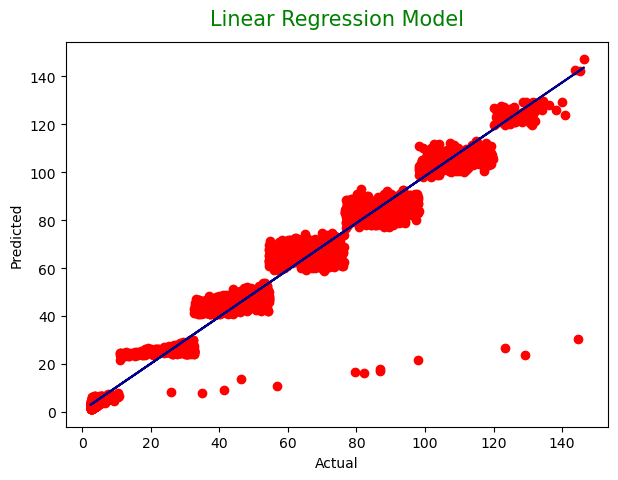

In [41]:
#visualize model
x = y_test
y = y_pred

plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## 5- Deploimentent

In [ ]:
import pickle

In [ ]:
# Enregistrer le modéle
pickle.dump(lr, open('model.pkl', 'wb'))